<a href="https://colab.research.google.com/github/pks98/Pracfiles/blob/main/OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('CarsEDA.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [4]:
df.shape

(8128, 5)

OneHotEncoding using pandas get_dummies function

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


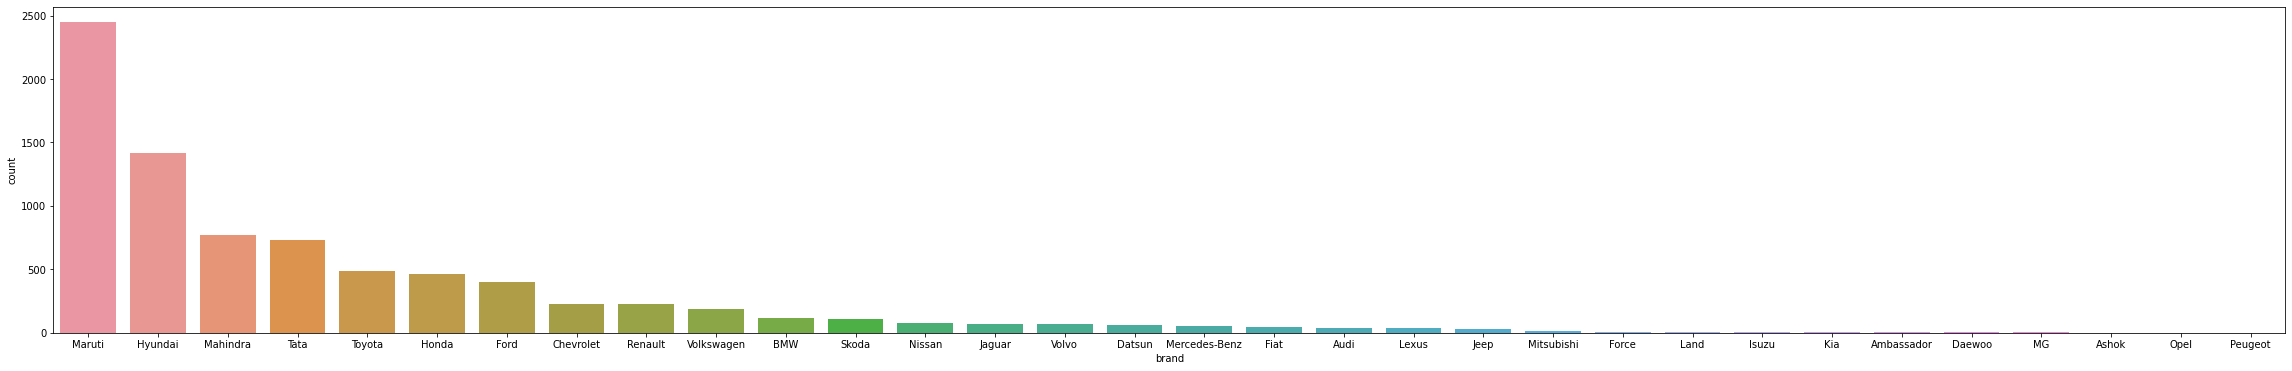

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 6))
sns.countplot(df['brand'],order=df['brand'].value_counts().index)

**Brand,fuel** and **owner** columns are the columns with nominal data, i,e the data that cannot be sorted in any order

In [26]:
pd.get_dummies(data=df,columns=['owner','fuel'])

,brand,km_driven,selling_price,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,450000,1,0,0,0,0,0,1,0,0
1,Skoda,120000,370000,0,0,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,1,0,0
4,Maruti,120000,130000,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,1,0,0,0,0,0,0,0,1
8124,Hyundai,119000,135000,0,1,0,0,0,0,1,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,1,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,1,0,0


In [52]:
d=pd.get_dummies(data=df,columns=['owner','fuel'],drop_first=True)

In [53]:
d

,brand,km_driven,selling_price,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti,145500,450000,0,0,0,0,1,0,0
1,Skoda,120000,370000,0,1,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,1
3,Hyundai,127000,225000,0,0,0,0,1,0,0
4,Maruti,120000,130000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,0,0,0,1
8124,Hyundai,119000,135000,1,0,0,0,1,0,0
8125,Maruti,120000,382000,0,0,0,0,1,0,0
8126,Tata,25000,290000,0,0,0,0,1,0,0


In [54]:
d.columns

Index(['brand', 'km_driven', 'selling_price', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'],
      dtype='object')

deleting the first column to avoid the dummy trap

OneHotEncoding using sklearn 

In [32]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [33]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [34]:
x.head()

,brand,km_driven,fuel,owner
0,Maruti,145500,Diesel,First Owner
1,Skoda,120000,Diesel,Second Owner
2,Honda,140000,Petrol,Third Owner
3,Hyundai,127000,Diesel,First Owner
4,Maruti,120000,Petrol,First Owner


In [30]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape,x_test.shape

((6502, 4), (1626, 4))

In [38]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [39]:
oe=OneHotEncoder(drop='first',sparse=False,dtype=np.int32)


1.   **drop='first'** parameter is used to drop the first column to avoid the dummy trap

2.   **sparse=False** parameter is used to get the values in numpy array format
3. **dtype=np.int32** is used to change the dummyvariable values datatype to int from float



In [40]:
oe.fit(x_train[['fuel','owner']])

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False)

In [42]:
x_train_new=oe.transform(x_train[['fuel','owner']])
x_test_new=oe.transform(x_test[['fuel','owner']])

In [43]:
x_test_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [47]:
data=np.hstack((x_train[['brand','km_driven']].values,x_train_new))

In [49]:
data

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

Creating the DataFrame using the data available

In [57]:
pd.DataFrame(data=data,columns=['brand', 'km_driven', 'owner_Fourth & Above Owner','owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner','fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'])

,brand,km_driven,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Hyundai,60000,0,1,0,0,0,0,0
1,Tata,150000,1,0,0,0,0,0,1
2,Hyundai,110000,1,0,0,0,1,0,0
3,Mahindra,28000,1,0,0,0,1,0,0
4,Maruti,15000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6497,Tata,70000,1,0,0,0,0,0,1
6498,Ford,100000,1,0,0,0,1,0,0
6499,Hyundai,90000,0,0,1,0,1,0,0
6500,Volkswagen,90000,1,0,0,0,0,0,0


In [51]:
x_train.columns

Index(['brand', 'km_driven', 'fuel', 'owner'], dtype='object')

OneHotEncoding on Brand column

In [59]:
counts=df['brand'].value_counts()

In [60]:
counts.head()

Maruti      2448
Hyundai     1415
Mahindra     772
Tata         734
Toyota       488
Name: brand, dtype: int64

In [63]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [64]:
df['brand'].nunique()

32

In [65]:
threshold=100

These brand will be considered as **others** category


In [66]:
counts[counts<=threshold]

Nissan           81
Jaguar           71
Volvo            67
Datsun           65
Mercedes-Benz    54
Fiat             47
Audi             40
Lexus            34
Jeep             31
Mitsubishi       14
Force             6
Land              6
Isuzu             5
Kia               4
Ambassador        4
Daewoo            3
MG                3
Ashok             1
Opel              1
Peugeot           1
Name: brand, dtype: int64

In [67]:
others_name=counts[counts<=threshold].index

In [68]:
others_name

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [69]:
pd.get_dummies(df['brand'].replace(others_name,'others'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,others
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
